In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.linear_model import ElasticNet,Lasso,Ridge,LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

from sklearn.metrics import roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import set_config

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

import joblib

from sklearn.model_selection import GridSearchCV,cross_val_score,cross_val_predict,cross_validate

from sklearn.preprocessing import PolynomialFeatures

In [2]:
train=pd.read_csv('train_ctrUa4K (1).csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
test=pd.read_csv('test_lAUu6dG (1).csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
sample=pd.read_csv('sample_submission_49d68Cx (1).csv')
sample

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [5]:
train.shape

(614, 13)

In [6]:
train.duplicated().sum()

0

In [7]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train[train['Dependents'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [9]:
train.dropna(inplace=True)

In [10]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
train.shape

(480, 13)

In [12]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
train.corr()

C:\Users\radia\AppData\Local\Temp\ipykernel_17728\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


C:\Users\radia\AppData\Local\Temp\ipykernel_17728\2178954303.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

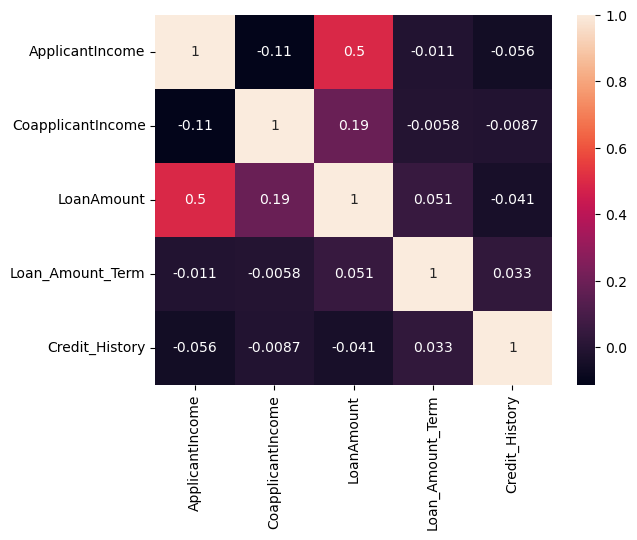

In [14]:
sns.heatmap(train.corr(),annot=True)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [16]:
train['Loan_Amount_Term']=train['Loan_Amount_Term'].astype('int')

In [17]:
train['Credit_History']=train['Credit_History'].astype('int')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    int32  
 10  Credit_History     480 non-null    int32  
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(2), int32(2), int64(1), object(8)
memory usage: 48.8+ KB


In [19]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
train.duplicated().sum()

0

In [22]:
train.shape

(480, 13)

In [23]:
train['Loan_Status'].replace({'Y':1,'N':0})

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [24]:
train['Loan_Status']=train['Loan_Status'].replace({'Y':1,'N':0})

In [25]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360,1,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360,1,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360,1,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180,1,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360,1,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360,1,Urban,1


In [26]:
train.select_dtypes(include=np.number)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,4583,1508.0,128.0,360,1,0
2,3000,0.0,66.0,360,1,1
3,2583,2358.0,120.0,360,1,1
4,6000,0.0,141.0,360,1,1
5,5417,4196.0,267.0,360,1,1
...,...,...,...,...,...,...
609,2900,0.0,71.0,360,1,1
610,4106,0.0,40.0,180,1,1
611,8072,240.0,253.0,360,1,1
612,7583,0.0,187.0,360,1,1


In [27]:
train.select_dtypes(exclude=np.number)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
1,LP001003,Male,Yes,1,Graduate,No,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,Urban
4,LP001008,Male,No,0,Graduate,No,Urban
5,LP001011,Male,Yes,2,Graduate,Yes,Urban
...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural
610,LP002979,Male,Yes,3+,Graduate,No,Rural
611,LP002983,Male,Yes,1,Graduate,No,Urban
612,LP002984,Male,Yes,2,Graduate,No,Urban


In [28]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        print('\n>>>>>>>init() called.\n')
    def fit(self, X, y = None):
        print('\n>>>>>>>fit() called.\n')
        return self
    def transform(self, X, y = None):
        print('\n>>>>>>>transform() called.\n')
        print("\n>>>> Input : ",X)
        X_ = X.applymap(lambda x: x.lower())
        print("\n>>>> Output : ",X_)
        print("\n>>>>>>> Custom Transformer Called")
        return X_

In [30]:

preprocess_categorical_encoding = Pipeline([('pre_preprocess', CustomTransformer()),
          ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
         ])

numerical_encoding_scaling = Pipeline([('scale', MinMaxScaler())])



>>>>>>>init() called.



In [31]:
preprocess_full = ColumnTransformer(
    transformers=
    [
    ('numerical_preprocessing',numerical_encoding_scaling,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']),
    ('categoral_preprocessing',preprocess_categorical_encoding,['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area'])
    
    ]
)

In [32]:
pipe = Pipeline([
         ('preprocess',preprocess_full),
         ('model',LinearRegression())])

In [33]:
X=train.drop(columns=['Loan_Status'])
y=train['Loan_Status']

In [34]:
pipe.fit(X,y)


>>>>>>>init() called.


>>>>>>>fit() called.


>>>>>>>transform() called.


>>>> Input :       Gender Married Dependents     Education Self_Employed Property_Area
1      Male     Yes          1      Graduate            No         Rural
2      Male     Yes          0      Graduate           Yes         Urban
3      Male     Yes          0  Not Graduate            No         Urban
4      Male      No          0      Graduate            No         Urban
5      Male     Yes          2      Graduate           Yes         Urban
..      ...     ...        ...           ...           ...           ...
609  Female      No          0      Graduate            No         Rural
610    Male     Yes         3+      Graduate            No         Rural
611    Male     Yes          1      Graduate            No         Urban
612    Male     Yes          2      Graduate            No         Urban
613  Female      No          0      Graduate           Yes     Semiurban

[480 rows x 6 columns]

>>>> Out

C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categoral_preprocessing',
                                                  Pipeline(steps=[('pre_preprocess',
                                                                   CustomTransformer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('model', LinearRegression())])

In [35]:
set_config(display='diagram')  
display(pipe)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categoral_preprocessing',
                                                  Pipeline(steps=[('pre_preprocess',
                                                                   CustomTransformer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('model', LinearRegression())])

In [36]:
pipe.predict(X)


>>>>>>>transform() called.


>>>> Input :       Gender Married Dependents     Education Self_Employed Property_Area
1      Male     Yes          1      Graduate            No         Rural
2      Male     Yes          0      Graduate           Yes         Urban
3      Male     Yes          0  Not Graduate            No         Urban
4      Male      No          0      Graduate            No         Urban
5      Male     Yes          2      Graduate           Yes         Urban
..      ...     ...        ...           ...           ...           ...
609  Female      No          0      Graduate            No         Rural
610    Male     Yes         3+      Graduate            No         Rural
611    Male     Yes          1      Graduate            No         Urban
612    Male     Yes          2      Graduate            No         Urban
613  Female      No          0      Graduate           Yes     Semiurban

[480 rows x 6 columns]

>>>> Output :       Gender Married Dependents     Educa

array([ 0.7578125,  0.84375  ,  0.75     ,  0.7265625,  0.7578125,
        0.765625 ,  0.2578125,  0.8359375,  0.71875  ,  0.890625 ,
        0.7734375,  0.7109375,  0.9453125,  0.734375 ,  0.0234375,
        0.7578125,  0.1015625,  0.6484375,  0.1953125,  0.90625  ,
        0.9296875,  0.8046875,  0.7109375,  0.7578125,  0.671875 ,
        0.9296875,  0.6328125,  0.8671875,  0.65625  ,  0.7734375,
        0.7578125,  0.7578125,  0.921875 ,  0.8203125,  0.8203125,
        0.078125 ,  0.7734375,  0.8203125,  0.796875 ,  0.8046875,
        0.8671875, -0.0234375,  0.984375 ,  0.9453125,  0.796875 ,
        0.7421875,  0.7734375,  0.8046875,  0.859375 ,  0.0546875,
        0.125    ,  0.8515625,  0.0078125,  0.703125 ,  0.8203125,
        0.1171875,  0.78125  ,  0.890625 ,  0.875    ,  0.90625  ,
        0.71875  ,  0.671875 ,  0.75     ,  0.2421875,  0.8046875,
        0.7734375,  0.8359375,  0.8203125,  0.9375   ,  0.703125 ,
        0.890625 ,  0.9140625,  0.9453125,  0.8125   ,  0.8515

In [37]:
new= pd.DataFrame([ 0.7578125,  0.84375  ,  0.75     ,  0.7265625,  0.7578125,
        0.765625 ,  0.2578125,  0.8359375,  0.71875  ,  0.890625 ,
        0.7734375,  0.7109375,  0.9453125,  0.734375 ,  0.0234375,
        0.7578125,  0.1015625,  0.6484375,  0.1953125,  0.90625  ,
        0.9296875,  0.8046875,  0.7109375,  0.7578125,  0.671875 ,
        0.9296875,  0.6328125,  0.8671875,  0.65625  ,  0.7734375,
        0.7578125,  0.7578125,  0.921875 ,  0.8203125,  0.8203125,
        0.078125 ,  0.7734375,  0.8203125,  0.796875 ,  0.8046875,
        0.8671875, -0.0234375,  0.984375 ,  0.9453125,  0.796875 ,
        0.7421875,  0.7734375,  0.8046875,  0.859375 ,  0.0546875,
        0.125    ,  0.8515625,  0.0078125,  0.703125 ,  0.8203125,
        0.1171875,  0.78125  ,  0.890625 ,  0.875    ,  0.90625  ,
        0.71875  ,  0.671875 ,  0.75     ,  0.2421875,  0.8046875,
        0.7734375,  0.8359375,  0.8203125,  0.9375   ,  0.703125 ,
        0.890625 ,  0.9140625,  0.9453125,  0.8125   ,  0.8515625,
        0.8671875,  0.8671875,  0.96875  ,  0.9140625,  0.9140625,
        0.8046875,  0.8046875,  0.7890625,  0.8203125,  0.125    ,
        0.8828125,  0.734375 ,  0.7890625,  0.859375 ,  0.78125  ,
        0.6171875,  0.8359375,  0.046875 ,  1.       ,  0.7109375,
        0.0859375,  0.7421875,  0.875    ,  1.015625 ,  0.859375 ,
        0.828125 ,  0.7890625,  0.84375  ,  0.1328125,  0.78125  ,
        0.8203125,  0.71875  ,  0.84375  ,  0.9296875,  0.875    ,
        0.8671875,  0.8515625,  0.8125   ,  0.625    ,  0.9375   ,
        0.0625   ,  0.7734375,  0.6875   ,  0.8046875,  0.7734375,
        0.125    ,  0.7578125,  0.8359375,  0.8828125,  0.765625 ,
        0.21875  ,  0.8359375,  0.890625 ,  0.7734375,  0.7890625,
        0.1796875,  0.953125 ,  0.828125 ,  0.875    ,  0.875    ,
        0.8125   ,  0.859375 ,  0.03125  ,  0.90625  , -0.03125  ,
        0.03125  ,  1.       ,  0.859375 ,  0.8984375,  0.9296875,
        0.125    ,  0.828125 ,  0.703125 ,  0.8359375,  0.75     ,
        0.8671875,  0.7265625,  0.859375 ,  0.671875 ,  0.75     ,
        0.828125 ,  0.1953125,  0.703125 ,  0.921875 ,  0.7265625,
        0.6953125,  0.6796875,  0.765625 ,  0.8515625,  0.7578125,
        0.28125  ,  0.71875  ,  0.7578125,  0.8046875,  0.90625  ,
        0.796875 ,  0.9296875,  0.1875   ,  0.96875  ,  0.8203125,
        0.9453125,  0.796875 ,  0.9296875,  0.6796875,  0.890625 ,
        0.7265625,  0.875    ,  0.7421875,  0.6328125,  0.9140625,
        0.828125 ,  0.7265625,  0.7265625,  0.8515625,  0.84375  ,
        0.71875  ,  0.8828125,  0.7421875,  0.859375 ,  0.828125 ,
        0.140625 ,  0.7109375,  0.6328125,  0.734375 ,  0.03125  ,
        0.625    ,  0.       ,  0.859375 ,  0.734375 ,  0.8203125,
        0.7890625,  0.6796875,  0.8359375,  0.6875   ,  0.9609375,
        0.140625 ,  0.640625 ,  0.71875  ,  0.828125 ,  0.7109375,
        0.9140625,  1.       ,  0.890625 ,  0.8828125,  0.8359375,
        0.8046875, -0.1015625,  0.9453125,  0.90625  ,  0.6953125,
        0.71875  ,  0.7890625,  0.8046875,  0.8046875,  0.703125 ,
        0.796875 ,  0.3125   ,  0.8515625,  0.8984375,  0.8671875,
        0.7265625,  0.625    ,  0.765625 ,  0.0859375,  0.671875 ,
        0.78125  ,  0.703125 ,  0.65625  ,  0.       ,  0.578125 ,
        0.8125   ,  0.7734375,  0.7109375,  0.7421875,  0.984375 ,
        0.75     ,  0.9296875,  0.9609375,  0.765625 , -0.0625   ,
        0.0546875,  0.890625 ,  0.765625 ,  0.703125 ,  0.6796875,
        0.859375 ,  0.7890625,  0.8203125,  0.734375 ,  0.7109375,
        0.6953125,  0.921875 ,  0.90625  ,  0.7890625,  0.7421875,
        0.8984375,  0.6171875,  0.8359375,  0.09375  ,  0.8828125,
        0.8203125,  0.8046875,  0.0703125,  0.90625  ,  0.7734375,
        0.90625  ,  0.8125   ,  0.703125 ,  0.6640625,  0.8359375,
        0.875    ,  0.5859375,  0.8203125,  0.96875  ,  0.6796875,
        0.03125  ,  0.859375 ,  0.8046875,  0.734375 ,  0.8671875,
        0.7421875,  0.6640625,  0.7265625,  0.8828125,  0.765625 ,
        0.8046875,  0.8203125,  0.71875  ,  0.7734375,  0.9375   ,
        0.8671875,  0.03125  ,  0.8359375,  0.65625  ,  0.1171875,
        0.1953125,  0.6953125,  0.7109375,  0.7578125,  0.6328125,
        0.8046875,  0.75     ,  0.640625 ,  0.2265625,  0.125    ,
        0.6953125,  0.0390625,  0.7421875,  0.1015625,  0.703125 ,
        0.6171875,  0.6484375,  0.8046875,  0.9296875,  0.8203125,
        0.828125 ,  0.96875  ,  0.7890625,  0.5859375,  0.984375 ,
        0.8359375,  0.734375 ,  0.7265625,  0.0625   ,  0.9140625,
        0.75     ,  0.8671875,  0.03125  ,  0.6875   ,  0.78125  ,
        0.7890625,  0.7734375,  0.8203125,  0.75     ,  0.8046875,
        0.1640625,  0.109375 ,  0.125    ,  0.1796875,  0.8515625,
        0.9921875,  0.8359375,  0.7890625,  0.765625 ,  0.9296875,
        0.8828125,  0.7890625,  0.1875   ,  0.71875  ,  0.1484375,
        0.8203125,  0.84375  ,  0.0625   ,  0.9765625,  0.71875  ,
        0.8359375,  0.9296875,  0.890625 ,  0.6015625,  0.78125  ,
        0.9140625,  0.8984375,  0.9296875,  0.6875   ,  0.1171875,
        0.6171875,  0.9296875,  0.7578125,  0.671875 ,  0.6796875,
        0.1328125,  0.890625 ,  0.75     ,  0.890625 , -0.015625 ,
        0.625    ,  0.8046875,  0.8984375,  0.875    ,  0.7734375,
        0.765625 ,  0.6796875,  0.6640625,  0.828125 ,  0.84375  ,
        0.9453125,  0.6171875,  0.796875 ,  0.8984375,  0.8046875,
        0.625    ,  0.9375   ,  0.8828125,  0.828125 ,  0.6328125,
        0.7265625,  0.9453125,  0.1328125,  0.7421875,  0.7890625,
        0.859375 ,  0.1015625,  0.6171875,  0.7109375,  0.890625 ,
        0.78125  ,  0.859375 ,  0.84375  ,  0.1328125,  0.6953125,
        0.7890625,  0.859375 ,  0.703125 ,  0.1328125,  0.8125   ,
        0.7421875,  0.046875 ,  0.1484375,  0.9375   ,  0.890625 ,
        0.90625  ,  0.8515625,  0.921875 ,  0.625    ,  0.765625 ,
        0.7734375,  0.1328125,  0.7578125,  0.1484375,  0.7265625,
        0.1484375,  0.7421875,  0.8125   ,  0.8515625,  0.953125 ,
        0.9140625,  0.71875  ,  0.765625 ,  0.9453125,  0.4921875,
        0.9296875,  0.078125 ,  0.7734375,  0.828125 ,  0.7578125,
        0.296875 ,  0.9765625,  0.9453125,  0.8203125,  0.765625 ,
        0.671875 ,  0.7421875,  0.7890625,  0.8359375,  0.84375  ,
        0.671875 ,  0.6796875,  0.859375 ,  0.7734375,  0.8125   ,
        0.703125 ,  0.90625  ,  0.7265625,  0.84375  ,  0.1015625])

In [38]:
new

,0
0,0.757812
1,0.843750
2,0.750000
3,0.726562
4,0.757812
...,...
475,0.703125
476,0.906250
477,0.726562
478,0.843750


In [39]:
new=pd.DataFrame(new.head(367))
new

,0
0,0.757812
1,0.843750
2,0.750000
3,0.726562
4,0.757812
...,...
362,0.187500
363,0.718750
364,0.148438
365,0.820312


In [40]:
new=new.rename(columns={0:'Loan_Status'})
new

,Loan_Status
0,0.757812
1,0.843750
2,0.750000
3,0.726562
4,0.757812
...,...
362,0.187500
363,0.718750
364,0.148438
365,0.820312


In [41]:
new['Loan_ID']=pd.DataFrame(sample['Loan_ID'])
new

,Loan_Status,Loan_ID
0,0.757812,LP001015
1,0.843750,LP001022
2,0.750000,LP001031
3,0.726562,LP001035
4,0.757812,LP001051
...,...,...
362,0.187500,LP002971
363,0.718750,LP002975
364,0.148438,LP002980
365,0.820312,LP002986


In [42]:
new['Loan_Status']=new['Loan_Status'].round()
new

,Loan_Status,Loan_ID
0,1.0,LP001015
1,1.0,LP001022
2,1.0,LP001031
3,1.0,LP001035
4,1.0,LP001051
...,...,...
362,0.0,LP002971
363,1.0,LP002975
364,0.0,LP002980
365,1.0,LP002986


In [43]:
new['Loan_Status']=new['Loan_Status'].replace({1.0:'Y',0.0:'N'})
new

,Loan_Status,Loan_ID
0,Y,LP001015
1,Y,LP001022
2,Y,LP001031
3,Y,LP001035
4,Y,LP001051
...,...,...
362,N,LP002971
363,Y,LP002975
364,N,LP002980
365,Y,LP002986


In [44]:
new.to_csv('Linearreg_pipeline.csv',index=False)

# public score :  0.6805555555555556

#  Pipelining by logistic regression

In [45]:
pipe_model1 = Pipeline([
    ('preprocess',preprocess_full),
    ('model', LogisticRegression())
])

In [46]:
pipe_model1.fit(X,y)


>>>>>>>init() called.


>>>>>>>fit() called.


>>>>>>>transform() called.


>>>> Input :       Gender Married Dependents     Education Self_Employed Property_Area
1      Male     Yes          1      Graduate            No         Rural
2      Male     Yes          0      Graduate           Yes         Urban
3      Male     Yes          0  Not Graduate            No         Urban
4      Male      No          0      Graduate            No         Urban
5      Male     Yes          2      Graduate           Yes         Urban
..      ...     ...        ...           ...           ...           ...
609  Female      No          0      Graduate            No         Rural
610    Male     Yes         3+      Graduate            No         Rural
611    Male     Yes          1      Graduate            No         Urban
612    Male     Yes          2      Graduate            No         Urban
613  Female      No          0      Graduate           Yes     Semiurban

[480 rows x 6 columns]

>>>> Out

C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categoral_preprocessing',
                                                  Pipeline(steps=[('pre_preprocess',
                                                                   CustomTransformer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('model', LogisticRegression())])

In [47]:
set_config(display='diagram')  
display(pipe_model1)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categoral_preprocessing',
                                                  Pipeline(steps=[('pre_preprocess',
                                                                   CustomTransformer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('model', LogisticRegression())])

In [48]:
test_predict_logistic = pipe_model1.predict_proba(X)[:,1]


>>>>>>>transform() called.


>>>> Input :       Gender Married Dependents     Education Self_Employed Property_Area
1      Male     Yes          1      Graduate            No         Rural
2      Male     Yes          0      Graduate           Yes         Urban
3      Male     Yes          0  Not Graduate            No         Urban
4      Male      No          0      Graduate            No         Urban
5      Male     Yes          2      Graduate           Yes         Urban
..      ...     ...        ...           ...           ...           ...
609  Female      No          0      Graduate            No         Rural
610    Male     Yes         3+      Graduate            No         Rural
611    Male     Yes          1      Graduate            No         Urban
612    Male     Yes          2      Graduate            No         Urban
613  Female      No          0      Graduate           Yes     Semiurban

[480 rows x 6 columns]

>>>> Output :       Gender Married Dependents     Educa

In [49]:
test_predict_logistic.shape

(480,)

In [50]:
test_logistic=pd.DataFrame(test_predict_logistic)
test_logistic

,0
0,0.723619
1,0.807596
2,0.752705
3,0.720904
4,0.781573
...,...
475,0.650973
476,0.841014
477,0.723286
478,0.834463


In [51]:
test_predict_logistic=pd.DataFrame(test_logistic.head(367))
test_predict_logistic

,0
0,0.723619
1,0.807596
2,0.752705
3,0.720904
4,0.781573
...,...
362,0.203407
363,0.687091
364,0.153502
365,0.811895


In [52]:
test_predict_logistic=test_predict_logistic.rename(columns={0:'Loan_Status'})
test_predict_logistic

,Loan_Status
0,0.723619
1,0.807596
2,0.752705
3,0.720904
4,0.781573
...,...
362,0.203407
363,0.687091
364,0.153502
365,0.811895


In [53]:
test_predict_logistic['Loan_Status']=test_predict_logistic['Loan_Status'].round()
test_predict_logistic

,Loan_Status
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
362,0.0
363,1.0
364,0.0
365,1.0


In [54]:
test_predict_logistic['Loan_Status']=test_predict_logistic['Loan_Status'].replace({0.0:'N',1.0:'Y'})
test_predict_logistic

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,N
363,Y
364,N
365,Y


In [55]:
test_predict_logistic['Loan_ID']=pd.DataFrame(sample['Loan_ID'])
test_predict_logistic

,Loan_Status,Loan_ID
0,Y,LP001015
1,Y,LP001022
2,Y,LP001031
3,Y,LP001035
4,Y,LP001051
...,...,...
362,N,LP002971
363,Y,LP002975
364,N,LP002980
365,Y,LP002986


In [56]:
test_predict_logistic.to_csv('logisticpipepred_loan.csv',index=False)

# Public score : 0.6805555555555556

# With polynomial

In [57]:
pipe_model_poly = Pipeline([
    ('preprocess',preprocess_full),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', LogisticRegression())
])

In [58]:
pipe_model_poly.fit(X,y)


>>>>>>>init() called.


>>>>>>>fit() called.


>>>>>>>transform() called.


>>>> Input :       Gender Married Dependents     Education Self_Employed Property_Area
1      Male     Yes          1      Graduate            No         Rural
2      Male     Yes          0      Graduate           Yes         Urban
3      Male     Yes          0  Not Graduate            No         Urban
4      Male      No          0      Graduate            No         Urban
5      Male     Yes          2      Graduate           Yes         Urban
..      ...     ...        ...           ...           ...           ...
609  Female      No          0      Graduate            No         Rural
610    Male     Yes         3+      Graduate            No         Rural
611    Male     Yes          1      Graduate            No         Urban
612    Male     Yes          2      Graduate            No         Urban
613  Female      No          0      Graduate           Yes     Semiurban

[480 rows x 6 columns]

>>>> Out

C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categoral_preprocessing',
                                                  Pipeline(steps=[('pre_preprocess',
                                                                   CustomTransformer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('polynomial', PolynomialFeatures()),
                ('model', LogisticRegression())])


>>>>>>>transform() called.


>>>> Input :       Gender Married Dependents     Education Self_Employed Property_Area
1      Male     Yes          1      Graduate            No         Rural
2      Male     Yes          0      Graduate           Yes         Urban
3      Male     Yes          0  Not Graduate            No         Urban
4      Male      No          0      Graduate            No         Urban
5      Male     Yes          2      Graduate           Yes         Urban
..      ...     ...        ...           ...           ...           ...
609  Female      No          0      Graduate            No         Rural
610    Male     Yes         3+      Graduate            No         Rural
611    Male     Yes          1      Graduate            No         Urban
612    Male     Yes          2      Graduate            No         Urban
613  Female      No          0      Graduate           Yes     Semiurban

[480 rows x 6 columns]

>>>> Output :       Gender Married Dependents     Educa

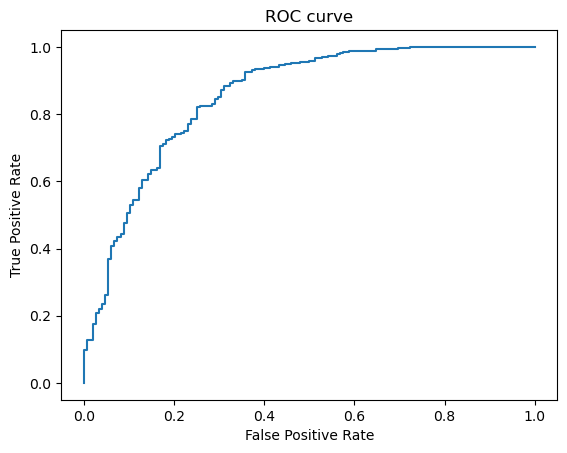

In [59]:
fpr, tpr, thresholds = roc_curve(y, pipe_model_poly.predict_proba(X)[:,1])
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y, pipe_model_poly.predict_proba(X)[:,1]))

In [60]:
pipe_model_poly.predict(X)


>>>>>>>transform() called.


>>>> Input :       Gender Married Dependents     Education Self_Employed Property_Area
1      Male     Yes          1      Graduate            No         Rural
2      Male     Yes          0      Graduate           Yes         Urban
3      Male     Yes          0  Not Graduate            No         Urban
4      Male      No          0      Graduate            No         Urban
5      Male     Yes          2      Graduate           Yes         Urban
..      ...     ...        ...           ...           ...           ...
609  Female      No          0      Graduate            No         Rural
610    Male     Yes         3+      Graduate            No         Rural
611    Male     Yes          1      Graduate            No         Urban
612    Male     Yes          2      Graduate            No         Urban
613  Female      No          0      Graduate           Yes     Semiurban

[480 rows x 6 columns]

>>>> Output :       Gender Married Dependents     Educa

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [61]:
test_polylogisticreg=pd.DataFrame([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [62]:
test_polylogisticreg

,0
0,1
1,1
2,1
3,1
4,1
...,...
475,1
476,1
477,1
478,1


In [63]:
test_polylogisticreg=test_polylogisticreg.rename(columns={0:'Loan_Status'})
test_polylogisticreg

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
475,1
476,1
477,1
478,1


In [64]:
test_polylogisticreg['Loan_Status']=test_polylogisticreg['Loan_Status'].replace({1:'Y',0:'N'})
test_polylogisticreg

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
475,Y
476,Y
477,Y
478,Y


In [65]:
test_polylogisticreg=pd.DataFrame(test_polylogisticreg.head(367))
test_polylogisticreg

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,N
363,Y
364,N
365,Y


In [66]:
test_polylogisticreg['Loan_ID']=pd.DataFrame(sample['Loan_ID'])
test_polylogisticreg

,Loan_Status,Loan_ID
0,Y,LP001015
1,Y,LP001022
2,Y,LP001031
3,Y,LP001035
4,Y,LP001051
...,...,...
362,N,LP002971
363,Y,LP002975
364,N,LP002980
365,Y,LP002986


In [67]:
test_polylogisticreg.to_csv('Polylogisticpipe_loan.csv',index=False)

# Public : 0.6736111111111112

In [68]:
joblib.dump(pipe,'LRmodel.pkl')

['LRmodel.pkl']

In [69]:
joblib.dump(pipe_model1,'LogR.pkl')

['LogR.pkl']

In [70]:
joblib.dump(pipe_model_poly,'polylogR.pkl')

['polylogR.pkl']